In [1]:
import pygmt
import geopandas as gpd

In [2]:
df = gpd.read_file(r'data/test_preds.shp')
df.to_crs("EPSG:4326", inplace=True)
df2 = gpd.read_file(r'data/train_data.shp')
df2.to_crs("EPSG:4326", inplace=True)

correct = df[df.correct=='Correct']
incorrect = df[df.correct=='Incorrect']

In [3]:
region = [-109.5, -106.25, 37.75, 39.25]

In [22]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="M4i", frame=["a",'+t"Gunnison Basin Crop Predictions"'])
fig.grdimage("@srtm_relief_03s", shading=True, cmap='green')
fig.plot(data=df2, color='forestgreen', label='Train')
fig.plot(data=correct, color='#21dd00', label='Correct')
fig.plot(data=incorrect, color='yellow', label='Incorrect')
fig.text(text=["SVC Accuracy: 0.75"], 
         x=-107, y=37.8)
fig.text(text=["https://cdss.colorado.gov/gis-data/division-4-gunnison"], x=-108.8, y=37.8, font="5p")
fig.legend()

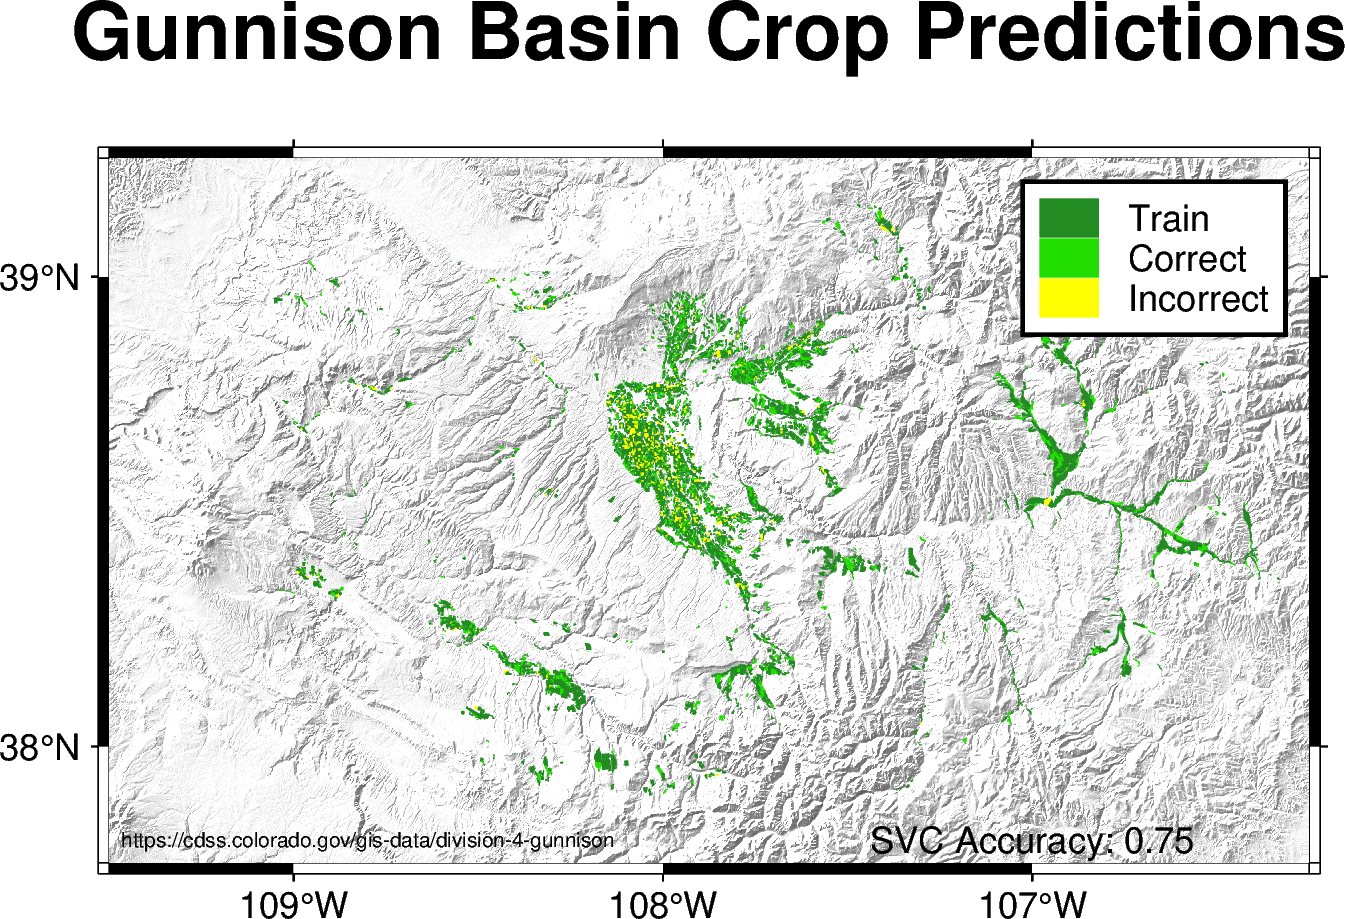

In [23]:
fig.show(width=1000)

In [ ]:
fig.savefit()